# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [3]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
#cosine_rv = sts.cosine()
laplace_rv = sts.laplace()

sample = laplace_rv.rvs(100)
sample

array([ 0.23013517, -2.20640419, -1.13009536, -0.42776975,  2.35127949,
       -1.15683225, -0.41203   ,  0.48424664, -5.410168  , -0.5982194 ,
        0.53978166,  1.08754889,  1.67626247,  1.0827155 ,  0.26478637,
       -0.94545985, -0.65842016, -0.17296047,  0.23424447,  2.03225879,
        0.41930387, -0.54511914, -0.43360323,  0.99733759,  0.65171723,
        1.08392528,  2.24608636, -1.21516296,  2.04165333,  1.17364348,
        0.03285739,  0.14430928,  0.41157401,  1.74457404,  1.41328197,
       -0.0333623 , -0.53304843,  0.12107932, -0.03616395, -0.32326141,
       -0.71662528,  0.09287629, -0.58124491,  1.80567471,  0.10361988,
        0.83188198,  0.99224209, -1.00869342,  0.01115761, -0.16596774,
        0.54087336,  1.21872772, -1.48743237, -1.22407511,  0.81135689,
       -0.65405827, -0.6738499 , -0.84470817, -0.34348825,  0.32050993,
       -4.03606458,  2.7876636 ,  0.39949075, -1.51837364, -0.42117771,
       -0.97427409, -0.02588463,  0.25580728, -0.55128656,  1.67

In [4]:
sample.dtype

dtype('float64')

In [5]:
real_mean = laplace_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [6]:
real_var = laplace_rv.var() # настоящая дисперсия случайной величины
real_var

2.0

### Постройте гистограмму выборки и теоретическую плотность распределения

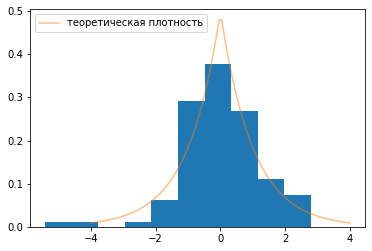

In [7]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [8]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.0224748730945154
1.4754531592159332


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [9]:
a = 2
b = 5

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([4.73919759, 3.75562198, 4.44677689, 2.66580323, 2.34740679,
       3.70802328, 4.29062671, 4.95267994, 2.84769101, 2.93573809])

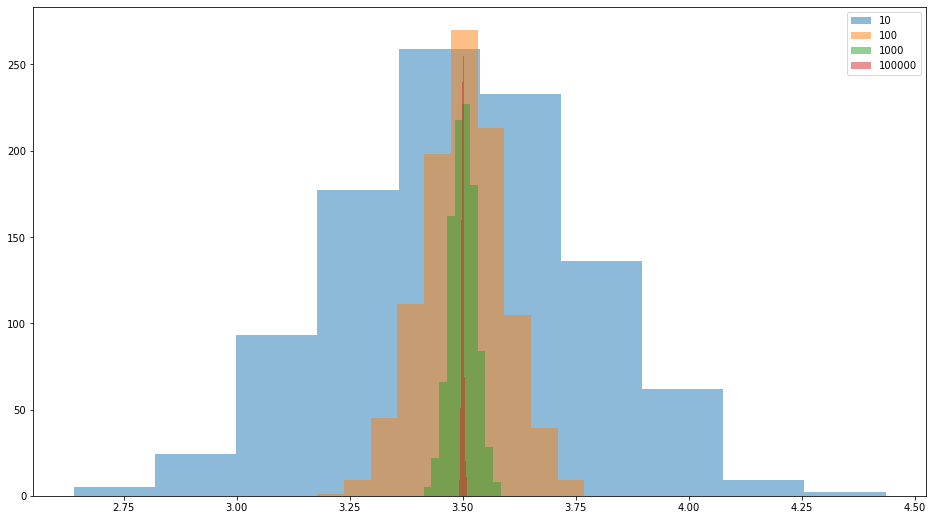

In [10]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 100000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '100000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [11]:
#для выбранного распределения апроксимация распределения выборочного среднего работает хорошо.
#С увеличением объема выборки стремится к 3,5

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [12]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [13]:
churn_true = df[df['churn'] == True]
churn_true.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [14]:
N = len(df)
N

3333

In [15]:
import statsmodels.stats.weightstats as ssw

In [16]:
data = churn_true['total day calls']
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * churn_true['total day calls'].std() / np.sqrt(N), np.mean(data) + 2 * churn_true['total day calls'].std() / np.sqrt(N) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [100.58773328949944, 102.08307416391672] 
Доверительный интервал для среднего по цпт интервальная оценка: (100.60270016209095, 102.0681072913252) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [28]:
# Сделайте оценку с использованием явной формулы для z интервала (Вариант 1)
mu = np.mean(churn_true['total day calls'])
sigma = np.std(data, ddof=1)
norm_rv = sts.norm(mu, sigma)
N = [10, 50, 100, 100000]
alpha = .05
for n in N:
    samples = np.linspace(churn_true['total day calls'].min(), churn_true['total day calls'].max(), n)
    pdf = norm_rv.pdf(samples)
    qa = norm_rv.pdf(alpha/2)
    qb = norm_rv.pdf(1-alpha/2)
    print ("Для N=%.f ДИ %.4f ... %.4f" % (n, samples[np.argmax(pdf)]-qa*np.sqrt(sigma/n), samples[np.argmax(pdf)]+qb*np.sqrt(sigma/n)))

Для N=10 ДИ 110.0000 ... 110.0000
Для N=50 ДИ 101.0204 ... 101.0204
Для N=100 ДИ 101.6667 ... 101.6667
Для N=100000 ДИ 101.3358 ... 101.3358


In [30]:
np.mean(churn_true['total day calls'])

101.33540372670808

In [65]:
# Сделайте оценку с использованием явной формулы для z интервала (Вариант 2)
df1=churn_true
stats = df1.groupby(['churn'])['total day calls'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo


In [63]:
stats

,mean,count,std,ci95_hi,ci95_lo
churn,,,,,
True,101.335404,483,21.582307,103.260181,99.410627


In [67]:
# Сделайте оценку с использованием явной формулы для z интервала (Вариант 3)

stats = df.groupby(['churn'])['total day calls'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

             mean  count        std     ci95_hi    ci95_lo
churn                                                     
False  100.283158   2850  19.801157  101.010141  99.556175
True   101.335404    483  21.582307  103.260181  99.410627


In [58]:
# Определение функции стандартной ошибки среднего
import scipy as sp
from scipy import stats

def variance(xs):
    '''Вычисление дисперсии,
       несмещенная дисперсия при n <= 30'''
    x_hat = xs.mean() 
    n = len(xs)
    n = n-1 if n in range(1, 30) else n  
    square_deviation = lambda x : (x - x_hat) ** 2 
    return sum( map(square_deviation, xs) ) / n

def standard_deviation(xs):
    '''Вычисление стандартного отклонения'''
    return sp.sqrt(variance(xs))

def standard_error(xs):
    '''Вычисление стандартной ошибки'''
    return standard_deviation(xs) / sp.sqrt(len(xs))

In [59]:
# Сделайте оценку с использованием явной формулы для z интервала (Вариант 4)
def confidence_interval(p, xs):
    '''Доверительный интервал'''
    x_hat = xs.mean()
    se = standard_error(xs)
    '''критическое значение z
    Критическое значение z - это число стандартных отклонений, на которые 
    нужно отойти от среднего значения нормального распределения, чтобы захватить 
    долю данных, связанную с нужным доверительным интервалом.'''
    z_crit = stats.norm.ppf(1 - (1-p) / 2)  #q=0.975 -> 1.96
    return [x_hat - z_crit * se, x_hat + z_crit * se]



In [61]:
def ex_2():
   
    ci = confidence_interval(0.95, churn_true['total day calls'])
    print('Доверительный интервал (ДИ): ', ci)
    
ex_2()

Доверительный интервал (ДИ):  [99.41265580945537, 103.25815164396079]


C:\Users\User\AppData\Local\Temp\ipykernel_7016\2737996735.py:16: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return sp.sqrt(variance(xs))
C:\Users\User\AppData\Local\Temp\ipykernel_7016\2737996735.py:20: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return standard_deviation(xs) / sp.sqrt(len(xs))


In [ ]:
1.Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063)     

2.Сделайте оценку с использованием явной формулы для z интервала:
Вариант 1: Для N=100000 ДИ 101.3358 ... 101.3358
Вариант 2,3:    
             mean  count        std     ci95_hi    ci95_lo
churn                                                     
False  100.283158   2850  19.801157  101.010141  99.556175
True   101.335404    483  21.582307  103.260181  99.410627

Вариант 4:
Доверительный интервал (ДИ):  [99.41265580945537, 103.25815164396079]
    
Вывод:
    ДИ можно определить разными способами, методом _zconfint_generic интервал получился более точным.